In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
#import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import math

# Load Data

In [2]:
sp500 = pd.read_excel('SP500_StockPrice.xlsx', header = [0, 1])

# Set Up

In [3]:
sp500

MMM                                    AOS                    \
            Adj Open  Adj High   Adj Low Adj Close Adj Open Adj High  Adj Low   
Date                                                                            
2005-01-03   57.9782   58.8461   57.8935   58.1405   5.3863   5.4475   5.2460   
2005-01-04   58.1405   58.5780   57.6254   57.6677   5.2892   5.3072   5.1435   
2005-01-05   57.6466   57.8230   56.9622   56.9622   5.1453   5.1453   4.9654   
2005-01-06   57.0680   58.1405   57.0257   57.4772   4.9942   5.0589   4.9762   
2005-01-07   57.5055   58.4227   57.3291   58.0699   5.0553   5.0571   4.9474   
2005-01-10   58.0699   59.4811   58.0699   59.2271   5.0193   5.0373   4.9474   
2005-01-11   59.2342   59.9680   59.1636   59.7704   4.9744   4.9852   4.8394   
2005-01-12   59.6787   59.9750   59.2694   59.9468   4.8394   4.8394   4.7585   
2005-01-13   59.7351   60.3278   58.9237   59.1213   4.7963   4.8376   4.7585   
2005-01-14   59.1213   59.4458   58.6344   59.2483   4.7927   4.8340   4.7531   
2005-01-18   59.2624   59.9750   57.5901   57.8724   4.7621   4.8358   4.7315   
2005-01-19   58.2110   58.4157   57.9288   57.9782   4.7675   4.8107   4.7495   
2005-01-20   58.3522   58.9519   57.9147   58.5286   4.7549   4.9240   4.7495   
2005-01-21   58.3874   58.6484   57.2797   57.3432   4.9690   5.0301   4.8988   
2005-01-24   57.5055   57.8300   57.0045   57.5901   4.9006   4.9780   4.8053   
2005-01-25   57.9641   58.5780   57.8653   58.4368   4.8502   4.9294   4.8430   
2005-01-26   58.5427   59.2059   58.5427   58.8602   4.8682   4.9150   4.8646   
2005-01-27   58.5638   58.9166   58.1687   58.4862   4.8953   4.9190   4.8735   
2005-01-28   58.4862   58.8461   58.4157   58.7402   4.8881   4.9244   4.8590   
2005-01-31   58.9872   59.6222   58.9872   59.5234   4.8935   4.9571   4.8735   
2005-02-01   59.5164   59.7633   59.1283   59.3259   4.9353   5.0970   4.9244   
2005-02-02   59.1071   59.1213   58.7120   58.8037   5.0734   5.0934   5.0516   
2005-02-03   58.8461   59.0436   58.5286   58.8037   5.0879   5.0879   5.0153   
2005-02-04   58.9519   59.4176   58.8602   59.3259   5.0879   5.1061   5.0607   
2005-02-07   59.3047   59.6222   59.1001   59.1848   5.1188   5.1970   5.0770   
2005-02-08   58.9519   59.6928   58.7544   59.5093   5.1170   5.1297   5.0334   
2005-02-09   59.5093   59.5305   58.7050   58.8108   5.0970   5.1079   4.9826   
2005-02-10   58.8390   59.3259   58.8108   59.1989   4.9935   5.0044   4.9190   
2005-02-11   59.2553   59.6363   58.7332   59.2977   4.9062   4.9789   4.8608   
2005-02-14   59.6011   59.9397   59.3753   59.6998   4.9608   4.9935   4.9335   
...              ...       ...       ...       ...      ...      ...      ...   
2018-11-09  204.0000  204.0000  199.6970  201.1000  46.5600  46.9400  45.2000   
2018-11-12  200.5700  200.7700  196.5000  197.0400  45.6900  45.9400  45.2000   
2018-11-13  197.5200  200.8800  197.1600  198.3700  45.6700  46.9000  45.5500   
2018-11-14  200.8000  201.0400  196.2900  198.0600  46.1300  46.5700  44.9400   
2018-11-15  197.7300  205.1300  196.2400  204.9100  44.8100  46.5800  44.6400   
2018-11-16  203.2400  209.7700  202.6040  209.0000  46.0200  46.4400  45.7100   
2018-11-19  207.8300  208.0500  204.3710  205.5800  45.8400  46.4000  45.5500   
2018-11-20  203.5800  204.1350  200.1900  200.5100  45.0400  46.2300  44.8700   
2018-11-21  199.6800  201.1800  198.6600  198.6900  45.7400  46.4700  45.6400   
2018-11-23  197.7600  198.6800  196.7900  196.8000  45.5100  46.0550  45.4200   
2018-11-26  198.5700  201.8300  197.3200  199.8600  46.0000  46.4600  45.8200   
2018-11-27  199.1200  201.3200  196.7790  200.6900  47.3000  47.4770  45.8500   
2018-11-28  201.9900  204.3500  199.4200  204.3400  46.3000  47.2200  45.4500   
2018-11-29  203.8700  205.8400  202.6600  204.5600  46.9800  47.1750  46.2900   
2018-11-30  204.3600  207.9200  203.9800  207.9200  46.8300  47.5900  46.5000   
2018-12-03  211.2100  211.9500  207.0500  208.76

In [4]:
subcol = ['Adj Open', 'Adj High', 'Adj Low']
#drop sub columns
sp500_sorted = sp500.drop(subcol, level = 1, axis = 1)
#drop sub colums level 1
sp500_sorted.columns = sp500_sorted.columns.droplevel(1)
sp500_sorted

,MMM,AOS,ABT,ABBV,ACN,ATVI,AYI,ADBE,AAP,AMD,...,WYNN,XEL,XRX,XLNX,XL,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,58.1405,5.2748,17.6798,NaN,20.4231,5.0209,26.8012,30.8392,27.6673,21.41,...,38.1389,10.3113,35.8512,21.5270,53.4915,NaN,12.9945,74.7168,56.7201,NaN
2005-01-04,57.6677,5.1561,17.5017,NaN,19.9429,4.8904,26.2580,30.0244,27.4831,20.21,...,38.0574,10.1568,35.3231,20.9166,53.6174,NaN,12.8224,74.6885,55.9458,NaN
2005-01-05,56.9622,4.9870,17.3010,NaN,19.8655,4.9621,25.0577,29.8594,27.5339,19.75,...,38.4880,10.0424,34.6259,20.2546,53.1070,NaN,12.7919,74.1050,55.7438,NaN
2005-01-06,57.4772,5.0535,17.6912,NaN,19.6873,4.8930,23.9275,29.3645,27.5085,19.72,...,40.0473,10.0252,34.4780,19.9310,53.1419,NaN,12.9362,74.9615,56.0636,NaN
2005-01-07,58.0699,5.0373,17.9942,NaN,20.6090,4.7293,25.6097,29.3845,27.3497,19.92,...,38.7149,9.9680,34.2879,20.1002,53.2048,NaN,12.8641,74.8297,54.7001,NaN
2005-01-10,59.2271,4.9762,18.1685,NaN,20.8800,4.7728,25.1891,29.4045,27.4450,20.13,...,38.8662,10.1053,34.0978,20.1370,53.1559,NaN,12.8668,75.5451,54.7338,NaN
2005-01-11,59.7704,4.8394,17.8351,NaN,20.5238,5.1027,25.1103,29.0545,27.6102,14.86,...,38.8196,10.1396,34.1611,19.7987,53.0440,NaN,12.9085,75.2251,54.7675,NaN
2005-01-12,59.9468,4.7927,17.8255,NaN,20.4386,5.0516,25.2417,29.4845,27.5085,15.02,...,38.1854,10.1282,34.2456,19.8134,53.2188,NaN,12.8058,75.0086,54.2540,NaN
2005-01-13,59.1213,4.7891,17.4837,NaN,20.2759,5.4173,24.9863,29.1045,27.4513,15.16,...,37.9702,10.2255,33.8231,19.3794,53.7013,NaN,12.6222,72.6272,53.6228,NaN


In [5]:
returns = np.log(sp500_sorted[0:3021]).diff().mean() * 252 ###############
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = np.log(sp500_sorted[0:3021]).diff().std() * sqrt(252) ##################
returns.dropna(inplace = True)
returns

,Returns,Volatility
MMM,0.090085,0.216496
AOS,0.181532,0.356813
ABT,0.061343,0.203863
ABBV,0.180369,0.273371
ACN,0.142568,0.258949
ATVI,0.163701,0.358701
AYI,0.179133,0.366555
ADBE,0.100588,0.336640
AAP,0.150775,0.316681
AMD,-0.053030,0.586054


In [6]:
#sharpratio = (returns['Returns'] - 0.024)/returns['Volatility']

In [7]:
x = returns['Volatility']
y = returns['Returns']

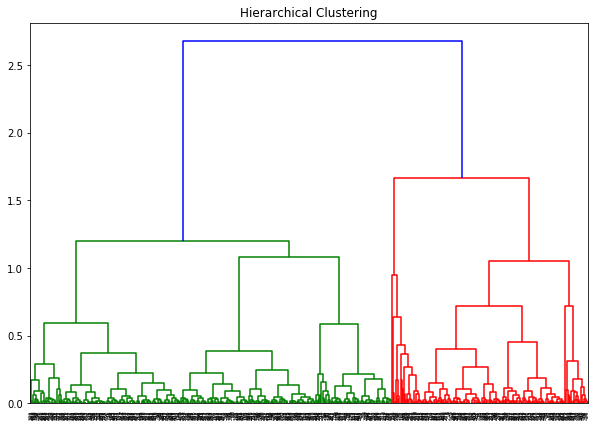

In [8]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Hierarchical Clustering")  
dend = shc.dendrogram(shc.linkage(returns, method='ward'))  
plt.show()

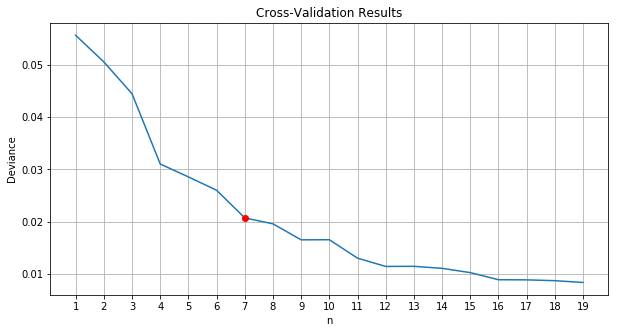

In [9]:
from sklearn.cluster import AgglomerativeClustering
sharperatio = (returns['Returns'] - 0.024)/returns['Volatility']
# Cross Validation
deviance = []
pred = []
for k in range(1, 20):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cl = cluster.fit_predict(returns)
    returns = pd.DataFrame(returns, columns = ['Returns', 'Volatility']) 
    cl = pd.DataFrame(cl, columns = ['Cluster Label'])
    index = pd.DataFrame(returns.index)
    labels = index.join(cl)
    labels.columns = ['ID', 'Cluster Label']
    labels = labels.set_index('ID')
    sr = labels.join(pd.DataFrame(sharperatio, columns = ['Sharpe Ratio']))
    A = sr.groupby(['Cluster Label']).mean()
    B = pd.DataFrame(cluster.fit_predict(returns), columns=['Cluster Label'])
    C = B.join(A, on='Cluster Label')
    if k == 7:
        pred = np.asarray(C['Sharpe Ratio'])
    diff = np.asarray(sharperatio) - np.asarray(C['Sharpe Ratio'])
    sse = (diff ** 2).sum()
    dev = sse / (len(y) - k)
    deviance.append(dev)

fig = plt.figure(figsize=(10, 5))
plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1, 20), deviance)
plt.grid(True)
plt.title('Cross-Validation Results')
plt.xlabel('n')
plt.ylabel('Deviance')
plt.plot(7, deviance[7 - 1], 'ro')
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
cluster.fit_predict(returns)

array([4, 2, 4, 3, 3, 2, 2, 1, 3, 5, 2, 1, 2, 2, 1, 4, 2, 0, 2, 1, 3, 0,
       4, 3, 2, 4, 1, 3, 4, 4, 3, 4, 5, 4, 2, 5, 3, 4, 2, 4, 3, 1, 3, 2,
       1, 0, 3, 1, 4, 2, 2, 3, 1, 3, 1, 5, 4, 1, 4, 2, 4, 3, 1, 1, 4, 5,
       4, 2, 4, 4, 2, 2, 2, 1, 1, 2, 2, 1, 4, 3, 4, 1, 1, 2, 2, 4, 2, 4,
       2, 1, 1, 4, 5, 0, 3, 2, 4, 1, 3, 0, 2, 3, 5, 4, 2, 1, 4, 2, 2, 1,
       4, 1, 5, 3, 1, 2, 4, 4, 2, 4, 1, 2, 4, 0, 1, 4, 3, 1, 4, 1, 3, 1,
       3, 2, 4, 2, 4, 1, 4, 1, 5, 4, 2, 3, 2, 2, 2, 1, 3, 3, 4, 1, 3, 4,
       4, 2, 5, 1, 1, 1, 4, 4, 3, 2, 1, 4, 5, 2, 1, 4, 2, 2, 1, 1, 4, 4,
       1, 2, 1, 3, 2, 4, 2, 3, 1, 1, 1, 3, 5, 1, 4, 1, 2, 2, 2, 1, 2, 4,
       3, 1, 5, 1, 2, 3, 4, 1, 5, 4, 1, 4, 3, 3, 1, 2, 4, 2, 2, 2, 3, 5,
       3, 3, 2, 2, 4, 2, 0, 4, 2, 4, 4, 4, 2, 1, 2, 5, 3, 3, 4, 4, 0, 0,
       1, 1, 0, 4, 2, 2, 4, 3, 0, 2, 4, 1, 3, 2, 4, 4, 1, 2, 2, 2, 4, 5,
       4, 2, 1, 1, 1, 4, 4, 2, 4, 4, 2, 1, 5, 2, 4, 5, 2, 4, 1, 1, 3, 1,
       2, 2, 2, 2, 1, 4, 2, 2, 3, 1, 4, 4, 3, 4, 4,

In [11]:
cl = cluster.fit_predict(returns)
print (cl)
#print(cluster.fit_predict(returns))

[4 2 4 3 3 2 2 1 3 5 2 1 2 2 1 4 2 0 2 1 3 0 4 3 2 4 1 3 4 4 3 4 5 4 2 5 3
 4 2 4 3 1 3 2 1 0 3 1 4 2 2 3 1 3 1 5 4 1 4 2 4 3 1 1 4 5 4 2 4 4 2 2 2 1
 1 2 2 1 4 3 4 1 1 2 2 4 2 4 2 1 1 4 5 0 3 2 4 1 3 0 2 3 5 4 2 1 4 2 2 1 4
 1 5 3 1 2 4 4 2 4 1 2 4 0 1 4 3 1 4 1 3 1 3 2 4 2 4 1 4 1 5 4 2 3 2 2 2 1
 3 3 4 1 3 4 4 2 5 1 1 1 4 4 3 2 1 4 5 2 1 4 2 2 1 1 4 4 1 2 1 3 2 4 2 3 1
 1 1 3 5 1 4 1 2 2 2 1 2 4 3 1 5 1 2 3 4 1 5 4 1 4 3 3 1 2 4 2 2 2 3 5 3 3
 2 2 4 2 0 4 2 4 4 4 2 1 2 5 3 3 4 4 0 0 1 1 0 4 2 2 4 3 0 2 4 1 3 2 4 4 1
 2 2 2 4 5 4 2 1 1 1 4 4 2 4 4 2 1 5 2 4 5 2 4 1 1 3 1 2 2 2 2 1 4 2 2 3 1
 4 4 3 4 4 2 3 5 2 1 2 1 1 1 4 4 1 0 1 5 1 1 2 2 1 2 0 1 2 2 1 1 4 4 3 4 2
 2 1 1 4 3 1 2 0 3 1 4 3 1 1 3 1 1 4 1 1 1 4 1 3 4 4 4 3 4 2 2 1 4 4 4 3 2
 4 1 2 2 4 2 5 2 5 1 2 4 2 2 4 1 2 2 0 5 4 3 1 1 4 3 3 2 1 0 2 4 1 1 2 1 4
 3 2 2 0 2 3 4 1 1 1 2 4 4 2 1 3 4 4 2 2 1 1 2 1 2 2 4 1 4 2 1 4 3 1 1 3 1
 1 3 3 2 1 1 1 1 1 0 0 6 3 5 1 4 0 4 3 2 3 2 1 2 1 4 4 0 1 3 2 1 4 1 4 1 4
 2 1 2 1 1 1 2 2 1 2 2 4 

In [12]:
returns = pd.DataFrame(returns, columns = ['Returns', 'Volatility']) 
cl = pd.DataFrame(cl, columns = ['Cluster Label'])
#returns.join(cl)

In [13]:
sharperatio = (returns['Returns'] - 0.024)/returns['Volatility']

# Summary
index = pd.DataFrame(returns.index)
labels = index.join(cl)
labels.columns = ['ID', 'Cluster Label']
labels = labels.set_index('ID')
sr = labels.join(pd.DataFrame(sharperatio, columns = ['Sharpe Ratio']))
sr_mean = sr.groupby(['Cluster Label']).mean()
print(sr_mean)
summary = returns.join(sr)
print(summary)

               Sharpe Ratio
Cluster Label              
0                  0.442025
1                  0.134668
2                  0.174075
3                  0.535957
4                  0.365853
5                 -0.091157
6                 -1.746544
        Returns  Volatility  Cluster Label  Sharpe Ratio
MMM    0.090085    0.216496              4      0.305250
AOS    0.181532    0.356813              2      0.441496
ABT    0.061343    0.203863              4      0.183178
ABBV   0.180369    0.273371              3      0.572003
ACN    0.142568    0.258949              3      0.457880
ATVI   0.163701    0.358701              2      0.389463
AYI    0.179133    0.366555              2      0.423219
ADBE   0.100588    0.336640              1      0.227507
AAP    0.150775    0.316681              3      0.400322
AMD   -0.053030    0.586054              5     -0.131439
AES    0.005560    0.379866              2     -0.048544
AET    0.123116    0.348655              1      0.284280
AMG    

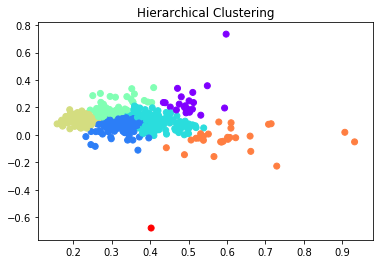

In [25]:
plt.title("Hierarchical Clustering")
plt.scatter(x, y, c=cluster.labels_, cmap='rainbow')
plt.show()

Goodness-of-fit Measure: 0.6327


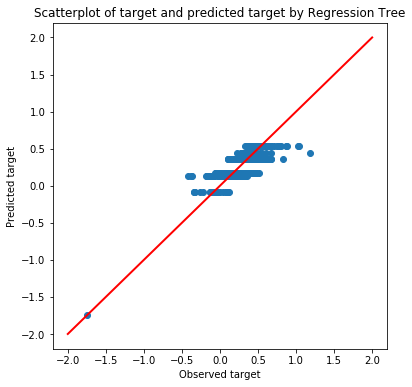

In [15]:
# Goodness of fit
from sklearn.metrics import r2_score
print("Goodness-of-fit Measure:", np.round(r2_score(np.asarray(sharperatio), pred),4))

plt.figure(1, figsize=(6,6))
plt.title("Scatterplot of target and predicted target by Regression Tree")
plt.ylabel("Predicted target")
plt.xlabel("Observed target")
plt.scatter(y=pred, x=np.asarray(sharperatio))
plt.plot([-2,2], [-2,2], "r-", linewidth=2)
plt.show()

In [16]:
# chosen_tick
chosen_tick_hc = list(summary[summary['Cluster Label'] == 3].index)
chosen_tick_hc

['ABBV',
 'ACN',
 'AAP',
 'ALXN',
 'AGN',
 'GOOGL',
 'AMZN',
 'AMT',
 'AME',
 'APH',
 'ANSS',
 'AAPL',
 'APTV',
 'AZO',
 'AVGO',
 'CELG',
 'CERN',
 'CHTR',
 'CFG',
 'STZ',
 'CCI',
 'CSX',
 'DLR',
 'DG',
 'DLTR',
 'DPS',
 'EW',
 'ESRX',
 'FB',
 'FIS',
 'FBHS',
 'IT',
 'GILD',
 'GPN',
 'HRS',
 'HAS',
 'HCA',
 'HII',
 'IDXX',
 'INTU',
 'JBHT',
 'LYB',
 'MA',
 'MCK',
 'MTD',
 'NKE',
 'NCLH',
 'ORLY',
 'OKE',
 'PKG',
 'PRGO',
 'PSX',
 'PCLN',
 'RMD',
 'ROP',
 'ROST',
 'SHW',
 'SNA',
 'SYF',
 'TMO',
 'TJX',
 'TSCO',
 'TDG',
 'UNP',
 'UHS',
 'VFC',
 'V',
 'YUM']